In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse as delta

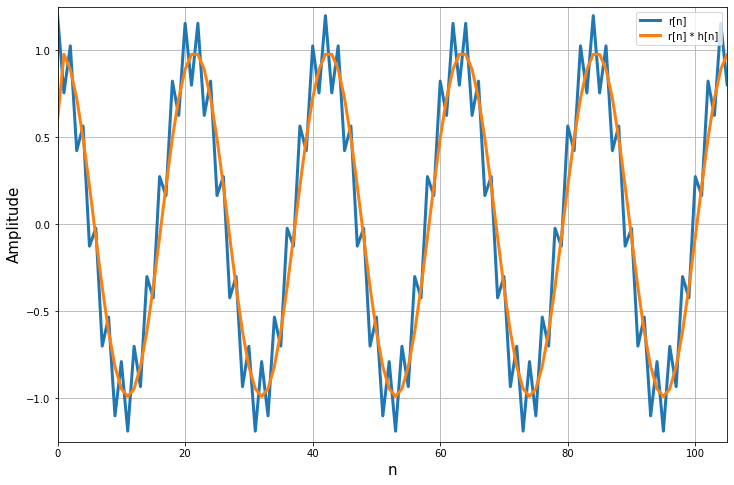

In [9]:
n = np.arange(0, 5096, 1)
x = np.cos(2*np.pi*n/21)
eta =  0.2*(-1)**n*delta(1, 0)
r = x + eta
h = 0.5*delta(2, 0) + 0.5*delta(2, 1)

M0 = 128
N = M0 + len(h) - 1
h0 = np.zeros(N)
h0[:len(h)] = h

rm = np.zeros((len(r)//M0 + 1, M0))

for i in range(len(r)//M0):
    for j in range(M0):
        rm[i][j] = r[M0*i + j]

for i in range(len(r)%M0):
    rm[-1][i] += r[M0*(len(r)//M0) + i]

ym = np.zeros((len(r)//M0 + 1, N))

for i in range(len(r)//M0 + 1):
    for j in range(N):
        for k in range(M0):
            ym[i][j] += rm[i][k]*h0[(j - k) % N]

y = np.zeros(len(r) + len(h) - 1)

for i in range(len(r)//M0):
    for j in range(N):
        y[M0*i + j] += ym[i][j]

for i in range(len(r)%M0):
    y[M0*(len(r)//M0) + i] += ym[-1][i]

ny = np.linspace(0, len(n), len(n) + 1)

plt.figure(figsize=(12, 8))
plt.plot(n, r, linewidth = 3, label = 'r[n]')
plt.plot(ny, y, linewidth = 3, label = 'r[n] * h[n]')
plt.xlim(0, 105)
plt.ylim(-1.25, 1.25)
plt.legend(loc = 'upper right',fontsize = 10)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.grid(True)